In [1]:
import numpy as np
import pandas as pd
import itertools

data = []

sides = [i for i in [1000,10000]]
nws = [i for i in range(1,9)]
#nws = [i for i in [1,5,10,15,20,25,30,40,50,60,80,100,120,150,200,250,300,350,400,450,500]]
seq_times = dict()
machine = "mac"
#machine = "xeon"
for s in sides:
    with open(f"/Users/michelebersani/Desktop/Scuola/IVanno/Parallel/project/results_{machine}/seq_{s}.txt") as ff:
        times = ff.readlines()
        times = np.array([int(t) for t in times])
        times = times*1e-6
        seq_times[s] = round(times.mean(), 4)
names = ["ff", "poolff", "thread", "new_thrp"]
for s in itertools.product(sides,nws):
    row = [s[0],s[1]]
    seq_time = seq_times[s[0]]
    for name in names:
        suffix = f"{name}_{s[0]}_{s[1]}.txt"
        with open(f"/Users/michelebersani/Desktop/Scuola/IVanno/Parallel/project/results_{machine}/{suffix}") as ff:
            times = ff.readlines()
            times = np.array([int(t) for t in times])
            times = times*1e-6
            row.append(round(times.mean(), 4))
            row.append(round(times.std(), 4))
            speedups = np.array([seq_time/time for time in times])
            row.append(speedups.mean())
            row.append(speedups.std())

    data.append(row)
df = pd.DataFrame(data, columns=['side','workers','ff_mean','ff_std','ff_speedup_mean','ff_speedup_std','ff_pool_mean','ff_pool_std','ff_pool_speedup_mean','ff_pool_speedup_std','thread_mean','thread_std', 'thread_speedup_mean','thread_speedup_std','threadpool_mean','threadpool_std', 'threadpool_speedup_mean','threadpool_speedup_std'])
print(df.shape)

(16, 18)


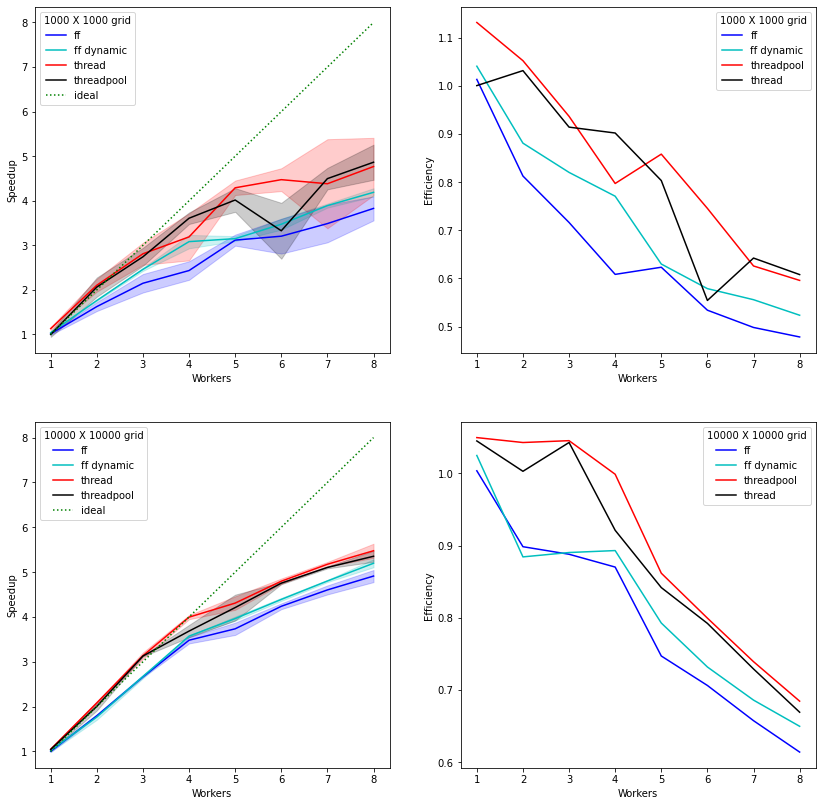

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(sides), 2, figsize=(14,14))

for i, s in enumerate(sides):

    small_df = df.loc[df['side'] == s]
    axs[i,0].plot(small_df['workers'], small_df['ff_speedup_mean'], 'b-', label='ff')
    axs[i,0].fill_between(small_df['workers'], small_df['ff_speedup_mean'] + small_df['ff_speedup_std'], small_df['ff_speedup_mean'] - small_df['ff_speedup_std'], color='b', alpha=0.2)
    axs[i,0].plot(small_df['workers'], small_df['ff_pool_speedup_mean'], 'c-', label='ff dynamic')
    axs[i,0].fill_between(small_df['workers'], small_df['ff_pool_speedup_mean'] + small_df['ff_pool_speedup_std'], small_df['ff_pool_speedup_mean'] - small_df['ff_pool_speedup_std'], color='c', alpha=0.2)
    axs[i,0].plot(small_df['workers'], small_df['thread_speedup_mean'], 'r-', label='thread')
    axs[i,0].fill_between(small_df['workers'], small_df['thread_speedup_mean'] + small_df['thread_speedup_std'], small_df['thread_speedup_mean'] - small_df['thread_speedup_std'], color='r', alpha=0.2)
    axs[i,0].plot(small_df['workers'], small_df['threadpool_speedup_mean'], 'k-', label='threadpool')
    axs[i,0].fill_between(small_df['workers'], small_df['threadpool_speedup_mean'] + small_df['threadpool_speedup_std'], small_df['threadpool_speedup_mean'] - small_df['threadpool_speedup_std'], color='k', alpha=0.2)
    axs[i,0].plot(small_df['workers'], small_df['workers'], 'g:', label='ideal')
    axs[i,0].set_ylabel('Speedup')
    axs[i,0].set_xlabel('Workers')
    axs[i,0].legend(title=f'{s} X {s} grid')

    axs[i,1].plot(small_df['workers'], small_df['ff_speedup_mean']/small_df['workers'], 'b-', label='ff')
    axs[i,1].plot(small_df['workers'], small_df['ff_pool_speedup_mean']/small_df['workers'], 'c-', label='ff dynamic')
    axs[i,1].plot(small_df['workers'], small_df['thread_speedup_mean']/small_df['workers'], 'r-', label='threadpool')
    axs[i,1].plot(small_df['workers'], small_df['threadpool_speedup_mean']/small_df['workers'], 'k-', label='thread')
    axs[i,1].set_ylabel('Efficiency')
    axs[i,1].set_xlabel('Workers')
    axs[i,1].legend(title=f'{s} X {s} grid')


#axs[0,0].set_ylim(-1, 50)
#axs[1,0].set_ylim(-1, 200)
plt.show()